

# Plotting dates and strings

The most basic way to use Matplotlib plotting methods is to pass coordinates in
as numerical numpy arrays.  For example, ``plot(x, y)`` will work if ``x`` and
``y`` are numpy arrays of floats (or integers).  Plotting methods will also
work if `numpy.asarray` will convert ``x`` and ``y`` to an array of floating
point numbers; e.g. ``x`` could be a python list.

Matplotlib also has the ability to convert other data types if a "unit
converter" exists for the data type.  Matplotlib has two built-in converters,
one for dates and the other for lists of strings.  Other downstream libraries
have their own converters to handle their data types.

The method to add converters to Matplotlib is described in `matplotlib.units`.
Here we briefly overview the built-in date and string converters.

## Date conversion

If ``x`` and/or ``y`` are a list of `datetime` or an array of
`numpy.datetime64`, Matplotlib has a built-in converter that will convert the
datetime to a float, and add tick locators and formatters to the axis that are
appropriate for dates.  See `matplotlib.dates`.

In the following example, the x-axis gains a converter that converts from
`numpy.datetime64` to float, and a locator that put ticks at the beginning of
the month, and a formatter that label the ticks appropriately:


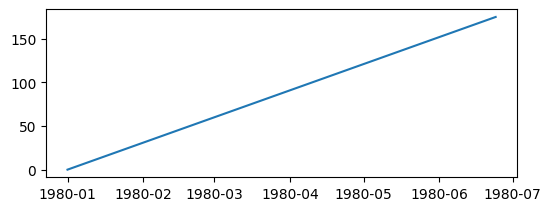

In [1]:
import numpy as np

import matplotlib.dates as mdates
import matplotlib.units as munits

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(5.4, 2), layout='constrained')
time = np.arange('1980-01-01', '1980-06-25', dtype='datetime64[D]')
x = np.arange(len(time))
ax.plot(time, x)

Note that if we try to plot a float on the x-axis, it will be plotted in
units of days since the "epoch" for the converter, in this case 1970-01-01
(see `date-format`).  So when we plot the value 0, the ticks start at
1970-01-01.  (The locator also now chooses every two years for a tick instead
of every month):



Text(0, 0, ' Float x=0')

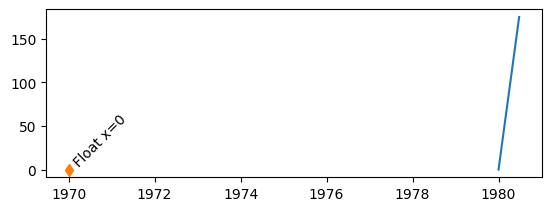

In [2]:
fig, ax = plt.subplots(figsize=(5.4, 2), layout='constrained')
time = np.arange('1980-01-01', '1980-06-25', dtype='datetime64[D]')
x = np.arange(len(time))
ax.plot(time, x)
# 0 gets labeled as 1970-01-01
ax.plot(0, 0, 'd')
ax.text(0, 0, ' Float x=0', rotation=45)

We can customize the locator and the formatter; see `date-locators` and
`date-formatters` for a complete list, and
`date_formatters_locators` for examples of them in use.  Here we locate
by every second month, and format just with the month's 3-letter name using
``"%b"`` (see `~datetime.datetime.strftime` for format codes):



Text(0.5, 0, '1980')

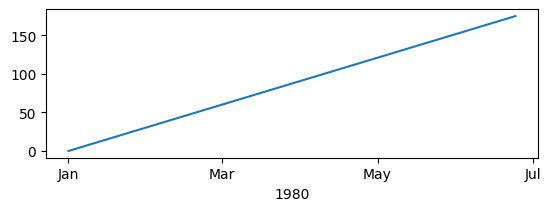

In [3]:
fig, ax = plt.subplots(figsize=(5.4, 2), layout='constrained')
time = np.arange('1980-01-01', '1980-06-25', dtype='datetime64[D]')
x = np.arange(len(time))
ax.plot(time, x)
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=np.arange(1, 13, 2)))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax.set_xlabel('1980')

The default locator is the `~.dates.AutoDateLocator`, and the default
Formatter `~.dates.AutoDateFormatter`.  There are also  "concise" formatter
and locators that give a more compact labelling, and can be set via rcParams.
Note how instead of the redundant "Jan" label at the start of the year,
"1980" is used instead.  See `date_concise_formatter` for more examples.



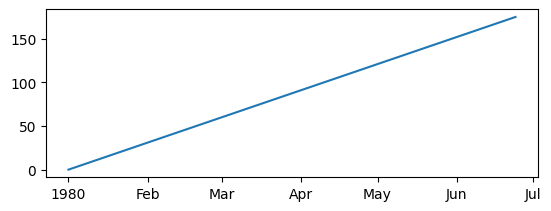

In [4]:
plt.rcParams['date.converter'] = 'concise'

fig, ax = plt.subplots(figsize=(5.4, 2), layout='constrained')
time = np.arange('1980-01-01', '1980-06-25', dtype='datetime64[D]')
x = np.arange(len(time))
ax.plot(time, x)

We can set the limits on the axis either by passing the appropriate dates as
limits, or by passing a floating-point value in the proper units of days
since the epoch.  If we need it, we can get this value from
`~.dates.date2num`.



(3683, 3743)

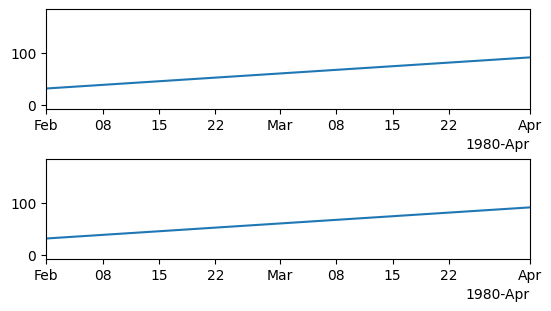

In [5]:
fig, axs = plt.subplots(2, 1, figsize=(5.4, 3), layout='constrained')
for ax in axs.flat:
    time = np.arange('1980-01-01', '1980-06-25', dtype='datetime64[D]')
    x = np.arange(len(time))
    ax.plot(time, x)

# set xlim using datetime64:
axs[0].set_xlim(np.datetime64('1980-02-01'), np.datetime64('1980-04-01'))

# set xlim using floats:
# Note can get from mdates.date2num(np.datetime64('1980-02-01'))
axs[1].set_xlim(3683, 3683+60)

## String conversion: categorical plots

Sometimes we want to label categories on an axis rather than numbers.
Matplotlib allows this using a "categorical" converter (see
`~.matplotlib.category`).



Text(0.5, 0.98, 'Categorical Plotting')

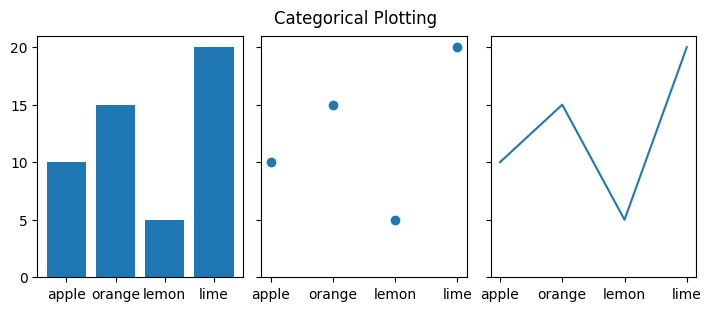

In [6]:
data = {'apple': 10, 'orange': 15, 'lemon': 5, 'lime': 20}
names = list(data.keys())
values = list(data.values())

fig, axs = plt.subplots(1, 3, figsize=(7, 3), sharey=True, layout='constrained')
axs[0].bar(names, values)
axs[1].scatter(names, values)
axs[2].plot(names, values)
fig.suptitle('Categorical Plotting')

Note that the "categories" are plotted in the order that they are first
specified and that subsequent plotting in a different order will not affect
the original order.  Further, new additions will be added on the end (see
"pear" below):



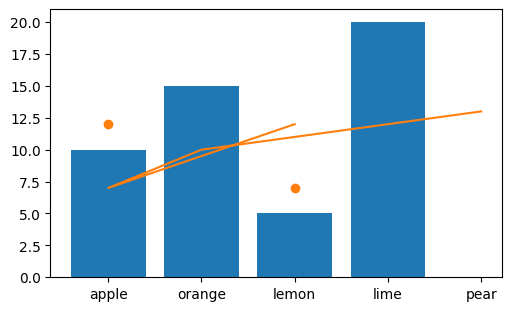

In [7]:
fig, ax = plt.subplots(figsize=(5, 3), layout='constrained')
ax.bar(names, values)

# plot in a different order:
ax.scatter(['lemon', 'apple'], [7, 12])

# add a new category, "pear", and put the other categories in a different order:
ax.plot(['pear', 'orange', 'apple', 'lemon'], [13, 10, 7, 12], color='C1')

Note that when using ``plot`` like in the above, the order of the plotting is
mapped onto the original order of the data, so the new line goes in the order
specified.

The category converter maps from categories to integers, starting at zero. So
data can also be manually added to the axis using a float.  Note that if a
float is passed in that does not have a "category" associated with it, the
data point can still be plotted, but a tick will not be created.  In the
following, we plot data at 4.0 and 2.5, but no tick is added there because
those are not categories.



Text(2.5, 3, 'Float x=2.5')

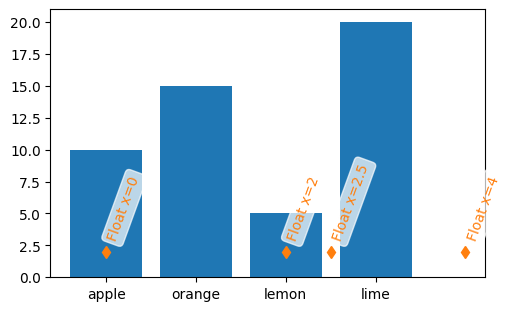

In [8]:
fig, ax = plt.subplots(figsize=(5, 3), layout='constrained')
ax.bar(names, values)
# arguments for styling the labels below:
args = {'rotation': 70, 'color': 'C1',
        'bbox': {'color': 'white', 'alpha': .7, 'boxstyle': 'round'}}


# 0 gets labeled as "apple"
ax.plot(0, 2, 'd', color='C1')
ax.text(0, 3, 'Float x=0', **args)

# 2 gets labeled as "lemon"
ax.plot(2, 2, 'd', color='C1')
ax.text(2, 3, 'Float x=2', **args)

# 4 doesn't get a label
ax.plot(4, 2, 'd', color='C1')
ax.text(4, 3, 'Float x=4', **args)

# 2.5 doesn't get a label
ax.plot(2.5, 2, 'd', color='C1')
ax.text(2.5, 3, 'Float x=2.5', **args)

Setting the limits for a category axis can be done by specifying the
categories, or by specifying floating point numbers:



Text(0.5, 0, 'limits set with floats')

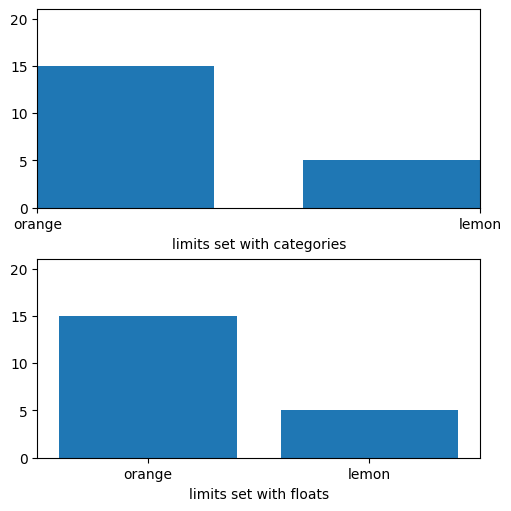

In [9]:
fig, axs = plt.subplots(2, 1, figsize=(5, 5), layout='constrained')
ax = axs[0]
ax.bar(names, values)
ax.set_xlim('orange', 'lemon')
ax.set_xlabel('limits set with categories')
ax = axs[1]
ax.bar(names, values)
ax.set_xlim(0.5, 2.5)
ax.set_xlabel('limits set with floats')

The category axes are helpful for some plot types, but can lead to confusion
if data is read in as a list of strings, even if it is meant to be a list of
floats or dates.  This sometimes happens when reading comma-separated value
(CSV) files. The categorical locator and formatter will put a tick at every
string value and label each one as well:



Text(0.5, 0, 'x is list of strings')

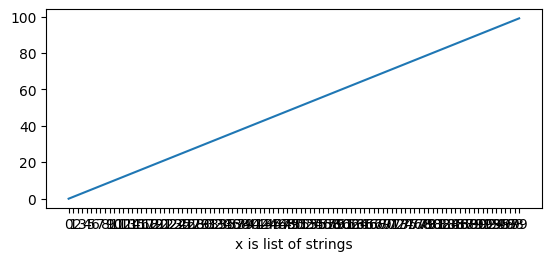

In [10]:
fig, ax = plt.subplots(figsize=(5.4, 2.5), layout='constrained')
x = [str(xx) for xx in np.arange(100)]  # list of strings
ax.plot(x, np.arange(100))
ax.set_xlabel('x is list of strings')

If this is not desired, then simply convert the data to floats before plotting:



Text(0.5, 0, 'x is array of floats')

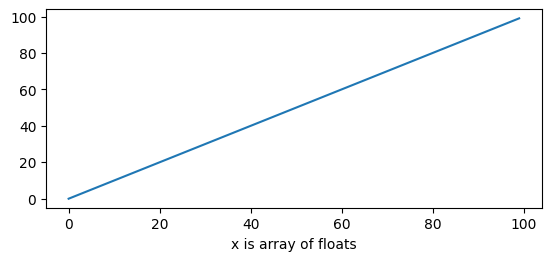

In [11]:
fig, ax = plt.subplots(figsize=(5.4, 2.5), layout='constrained')
x = np.asarray(x, dtype='float')  # array of float.
ax.plot(x, np.arange(100))
ax.set_xlabel('x is array of floats')

## Determine converter, formatter, and locator on an axis

Sometimes it is helpful to be able to debug what Matplotlib is using to
convert the incoming data.  We can do that by querying the ``converter``
property on the axis.  We can also query the formatters and locators using
`~.axis.Axis.get_major_locator` and `~.axis.Axis.get_major_formatter`.

Note that by default the converter is *None*.



Text(0.5, 0, 'Converter: <matplotlib.category.StrCategoryConverter object at 0x00000232D6D942F0>\n Locator: <matplotlib.category.StrCategoryLocator object at 0x00000232D885DDF0>\nFormatter: <matplotlib.category.StrCategoryFormatter object at 0x00000232D885DCD0>\n')

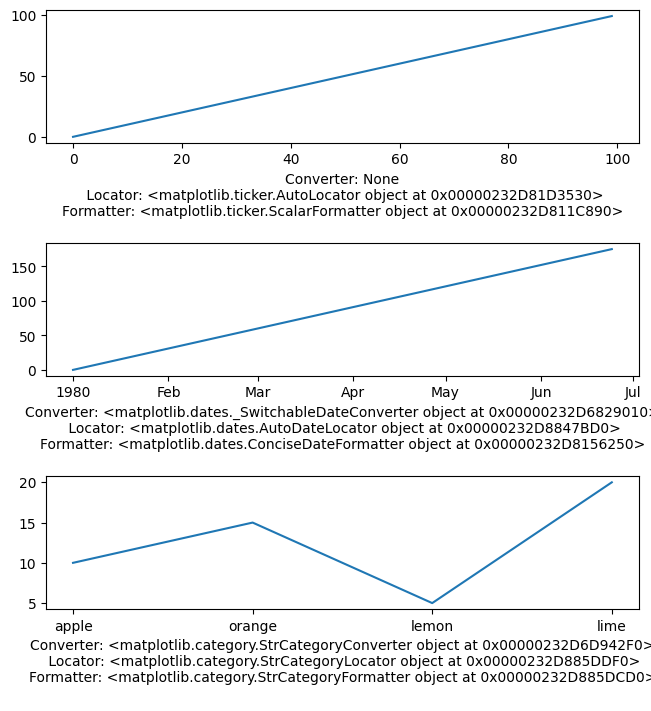

In [12]:
fig, axs = plt.subplots(3, 1, figsize=(6.4, 7), layout='constrained')
x = np.arange(100)
ax = axs[0]
ax.plot(x, x)
label = f'Converter: {ax.xaxis.get_converter()}\n '
label += f'Locator: {ax.xaxis.get_major_locator()}\n'
label += f'Formatter: {ax.xaxis.get_major_formatter()}\n'
ax.set_xlabel(label)

ax = axs[1]
time = np.arange('1980-01-01', '1980-06-25', dtype='datetime64[D]')
x = np.arange(len(time))
ax.plot(time, x)
label = f'Converter: {ax.xaxis.get_converter()}\n '
label += f'Locator: {ax.xaxis.get_major_locator()}\n'
label += f'Formatter: {ax.xaxis.get_major_formatter()}\n'
ax.set_xlabel(label)

ax = axs[2]
data = {'apple': 10, 'orange': 15, 'lemon': 5, 'lime': 20}
names = list(data.keys())
values = list(data.values())
ax.plot(names, values)
label = f'Converter: {ax.xaxis.get_converter()}\n '
label += f'Locator: {ax.xaxis.get_major_locator()}\n'
label += f'Formatter: {ax.xaxis.get_major_formatter()}\n'
ax.set_xlabel(label)

## More about "unit" support

The support for dates and categories is part of "units" support that is built
into Matplotlib.  This is described at `.matplotlib.units` and in the
`basic_units` example.

Unit support works by querying the type of data passed to the plotting
function and dispatching to the first converter in a list that accepts that
type of data.  So below, if ``x`` has ``datetime`` objects in it, the
converter will be ``_SwitchableDateConverter``; if it has has strings in it,
it will be sent to the ``StrCategoryConverter``.



In [13]:
for k, v in munits.registry.items():
    print(f"type: {k};\n    converter: {type(v)}")

type: <class 'decimal.Decimal'>;
    converter: <class 'matplotlib.units.DecimalConverter'>
type: <class 'numpy.datetime64'>;
    converter: <class 'matplotlib.dates._SwitchableDateConverter'>
type: <class 'datetime.date'>;
    converter: <class 'matplotlib.dates._SwitchableDateConverter'>
type: <class 'datetime.datetime'>;
    converter: <class 'matplotlib.dates._SwitchableDateConverter'>
type: <class 'str'>;
    converter: <class 'matplotlib.category.StrCategoryConverter'>
type: <class 'numpy.str_'>;
    converter: <class 'matplotlib.category.StrCategoryConverter'>
type: <class 'bytes'>;
    converter: <class 'matplotlib.category.StrCategoryConverter'>
type: <class 'numpy.bytes_'>;
    converter: <class 'matplotlib.category.StrCategoryConverter'>


There are a number of downstream libraries that provide their own converters
with locators and formatters.  Physical unit support is provided by
[astropy](https://www.astropy.org), [pint](https://pint.readthedocs.io), and
[unyt](https://unyt.readthedocs.io), among others.

High level libraries like [pandas](https://pandas.pydata.org) and
[nc-time-axis](https://nc-time-axis.readthedocs.io) (and thus
[xarray](https://docs.xarray.dev)) provide their own datetime support.
This support can sometimes be incompatible with Matplotlib native datetime
support, so care should be taken when using Matplotlib locators and
formatters if these libraries are being used.

